In [39]:
%pip install pandas
%pip install numpy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: C:\Users\haohu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: C:\Users\haohu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.1.1
[notice] To update, run: C:\Users\haohu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
condition_o = {'O20', 'O21', 'O22', 'O24', 'O25', 'O26','O27', 'O28','O29','O30','O31','O32','O33','O34'}
condition_ox = {'OX20', 'OX21', 'OX22','OX23', 'OX24', 'OX25', 'OX26','OX27', 'OX28','OX29','OX31','OX32','OX33','OX34'}
plt.rcParams['font.family'] = 'sans-serif'  # Set global font to sans-serif
plt.rcParams['font.sans-serif'] = 'Arial'  # Specify the font name explicitly

file3 = 'interval_data_with_average_durations.csv'
df = pd.read_csv(file3)
o_data = df[df['id'].isin(condition_o)]
ox_data = df[df['id'].isin(condition_ox)]

task = o_data['task']

def plot_average_duration_over_task(o_data, ox_data):
    # task is values from -1 to 15
    N = 14
    task = o_data['task']
    o_array_fixation_durations = []
    o_array_fixation_durations_elmo = []
    ox_array_fixation_durations = []
    ox_array_fixation_durations_elmo = []
    section_interval = 47
    for j in range(0, section_interval):
        o_fixation_duration = 0
        o_fixation_duration_elmo = 0
        ox_fixation_duration = 0
        ox_fixation_duration_elmo = 0

        for i in range(0, len(task), section_interval):
            
            o_fixation_duration += o_data['fixation_durations'][i+j]
            o_fixation_duration_elmo += o_data['fixation_durations_elmo'][i+j]
            ox_fixation_duration += ox_data['fixation_durations'][i+j+len(task)]
            ox_fixation_duration_elmo += ox_data['fixation_durations_elmo'][i+j+len(task)]

        average_o_fixation_duration = o_fixation_duration / N
        average_o_fixation_duration_elmo = o_fixation_duration_elmo / N
        average_ox_fixation_duration = ox_fixation_duration / N
        average_ox_fixation_duration_elmo = ox_fixation_duration_elmo / N

        o_array_fixation_durations.append(average_o_fixation_duration)
        o_array_fixation_durations_elmo.append(average_o_fixation_duration_elmo)
        ox_array_fixation_durations.append(average_ox_fixation_duration)
        ox_array_fixation_durations_elmo.append(average_ox_fixation_duration_elmo)
    # Create the plot

    intro = -1
    tutorial = 0
    test = np.linspace(1.33333, 16, 45)
    # add together intro,tutorial and test
    task = np.concatenate((np.array([intro, tutorial]), test))

    positions = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    labels = ['Intro', 'Tutorial', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    plt.figure(figsize=(10, 6))

    

    plt.scatter(task[0:47], o_array_fixation_durations[0:47], marker = 'o', color='b', label='O')
    plt.scatter(task[0:47], ox_array_fixation_durations[0:47], marker = 'x', color='k', label='OX')
    plt.xlim(-1.5, 16)
    # Define the positions and corresponding labels

    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Computer Fixation Duration [s]')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    plt.legend()
    # Show the plot
    plt.tight_layout()
    # plt.savefig('results/computer_average_fixation_durations_over_decision.png', dpi=1200, bbox_inches='tight')

    plt.figure(figsize=(10, 6))
    plt.scatter(task[0:47], o_array_fixation_durations_elmo[0:47], marker = 'o', color='b', label='O')
    plt.scatter(task[0:47], ox_array_fixation_durations_elmo[0:47], marker = 'x', color='k', label='OX')

    plt.xlim(-1.5, 16)
    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Elmo Fixation Duration [s]')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)

    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()
    plt.savefig('results/elmo_average_fixation_durations_over_decision.png', dpi=1600, bbox_inches='tight')
plot_average_duration_over_task(o_data, ox_data)



TypeError: plot_average_duration_over_task() missing 1 required positional argument: 'identifiers'

## The decision-making task is divided by two sections
### Human Decision (Human Decision until SubmitConfidence) and Human-AI Decision (Submit Confidence Until Feedback). Feedback is Final Decision Click + 2 seconds


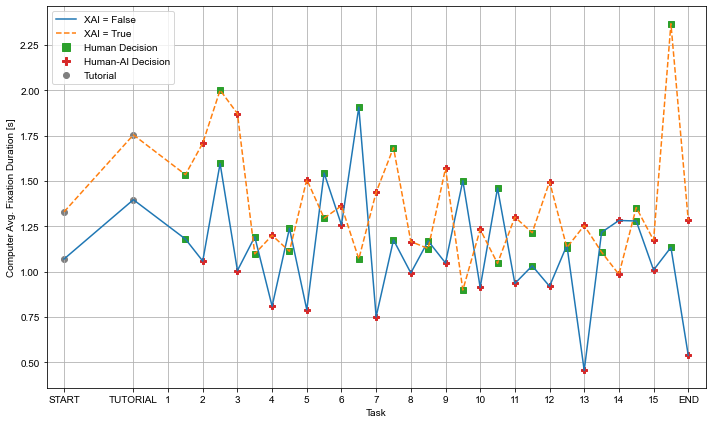

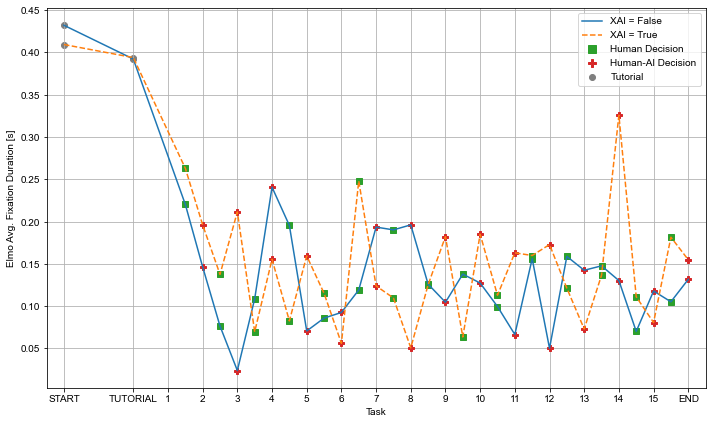

In [68]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
condition_o = {'O20', 'O21', 'O22', 'O24', 'O25', 'O26','O27', 'O28','O29','O30','O31','O32','O33','O34'}
condition_ox = {'OX20', 'OX21', 'OX22','OX23', 'OX24', 'OX25', 'OX26','OX27', 'OX28','OX29','OX31','OX32','OX33','OX34'}
plt.rcParams['font.family'] = 'sans-serif'  # Set global font to sans-serif
plt.rcParams['font.sans-serif'] = 'Arial'  # Specify the font name explicitly

file3 = 'interval_data_with_average_durations.csv'

df = pd.read_csv(file3)
o_data = df[df['id'].isin(condition_o)]
ox_data = df[df['id'].isin(condition_ox)]

task = o_data['task']

def plot_average_duration_over_task(o_data, ox_data):
    # task is values from -1 to 15
    N = 14
    task = o_data['task']
    o_array_fixation_durations = []
    o_array_fixation_durations_elmo = []
    ox_array_fixation_durations = []
    ox_array_fixation_durations_elmo = []
    section_interval = 32
    for j in range(0, section_interval):
        o_fixation_duration = 0
        o_fixation_duration_elmo = 0
        ox_fixation_duration = 0
        ox_fixation_duration_elmo = 0

        for i in range(0, len(task), section_interval):
            
            o_fixation_duration += o_data['fixation_durations'][i+j]
            o_fixation_duration_elmo += o_data['fixation_durations_elmo'][i+j]
            ox_fixation_duration += ox_data['fixation_durations'][i+j+len(task)]
            ox_fixation_duration_elmo += ox_data['fixation_durations_elmo'][i+j+len(task)]

        average_o_fixation_duration = o_fixation_duration / N
        average_o_fixation_duration_elmo = o_fixation_duration_elmo / N
        average_ox_fixation_duration = ox_fixation_duration / N
        average_ox_fixation_duration_elmo = ox_fixation_duration_elmo / N

        o_array_fixation_durations.append(average_o_fixation_duration)
        o_array_fixation_durations_elmo.append(average_o_fixation_duration_elmo)
        ox_array_fixation_durations.append(average_ox_fixation_duration)
        ox_array_fixation_durations_elmo.append(average_ox_fixation_duration_elmo)
    # Create the plot
    intro = -2
    tutorial = 0
    test = np.linspace(1.5, 16, 30)
    # add together intro,tutorial and test
    task = np.concatenate((np.array([intro, tutorial]), test))
    positions = [-2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    labels = ['START', 'TUTORIAL', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'END']


    plt.figure(figsize=(10, 6))
    plt.scatter(task[0], o_array_fixation_durations[0], marker = "o", color='tab:gray')
    plt.scatter(task[0], ox_array_fixation_durations[0], marker = "o", color='tab:gray')
    plt.scatter(task[1], o_array_fixation_durations[1], marker = "o", color='tab:gray')
    plt.scatter(task[1], ox_array_fixation_durations[1], marker = "o", color='tab:gray')

    # Plot data with alternating markers
    for i in range(2, len(task), 1):
        if i % 2 == 0:
            marker = "s"
            label = "Human"
            color = 'tab:green'
        else:
            marker = "P"
            label = "Human-AI"
            color = 'tab:red'
        plt.plot(task[i], o_array_fixation_durations[i], marker=marker, color=color, label=label)
        plt.plot(task[i], ox_array_fixation_durations[i], marker=marker, color=color, label=label)

    plt.plot(task, o_array_fixation_durations, color='tab:blue', label='O', linestyle = '-')
    plt.plot(task, ox_array_fixation_durations, color='tab:orange', label='OX', linestyle = '--')

    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
        plt.Line2D([], [], marker='s', color='tab:green', linestyle='None', markersize=8, label='Human Decision'),
        plt.Line2D([], [], marker='P', color='tab:red', linestyle='None', markersize=8, label='Human-AI Decision'),
        plt.Line2D([], [], marker='o', color='tab:gray', linestyle='None', markersize=6, label='Tutorial'),
    ]
    plt.legend(handles=handles)
    
    plt.xlim(-2.5, 16.5)

    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Computer Avg. Fixation Duration [s]')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/computer_average_fixation_durations_over_decision.png', dpi=1600, bbox_inches='tight')

    plt.figure(figsize=(10, 6))

    plt.scatter(task[0], o_array_fixation_durations_elmo[0], marker = "o", color='tab:gray')
    plt.scatter(task[0], ox_array_fixation_durations_elmo[0], marker = "o", color='tab:gray')
    plt.scatter(task[1], o_array_fixation_durations_elmo[1], marker = "o", color='tab:gray')
    plt.scatter(task[1], ox_array_fixation_durations_elmo[1], marker = "o", color='tab:gray')

    # Plot data with alternating markers
    for i in range(2, len(task), 1):
        if i % 2 == 0:
            marker = "s"
            label = "Human"
            color = 'tab:green'
        else:
            marker = "P"
            label = "Human-AI"
            color = 'tab:red'

        plt.plot(task[i], o_array_fixation_durations_elmo[i], marker=marker, color=color, label=label)
        plt.plot(task[i], ox_array_fixation_durations_elmo[i], marker=marker, color=color, label=label)
    plt.plot(task, o_array_fixation_durations_elmo, color='tab:blue', linestyle = '-')
    plt.plot(task, ox_array_fixation_durations_elmo, color='tab:orange', linestyle = '--')

    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
        plt.Line2D([], [], marker='s', color='tab:green', linestyle='None', markersize=8, label='Human Decision'),
        plt.Line2D([], [], marker='P', color='tab:red', linestyle='None', markersize=8, label='Human-AI Decision'),
        plt.Line2D([], [], marker='o', color='tab:gray', linestyle='None', markersize=6, label='Tutorial'),
    ]
    plt.legend(handles=handles)
    
    plt.xlim(-2.5, 16.5)
    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Elmo Avg. Fixation Duration [s]')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/elmo_average_fixation_durations_over_decision.png', dpi=1600, bbox_inches='tight')
    plt.show()
    
plot_average_duration_over_task(o_data, ox_data)


### Average Fixation Duration WITHOUT TUTORIAL/START

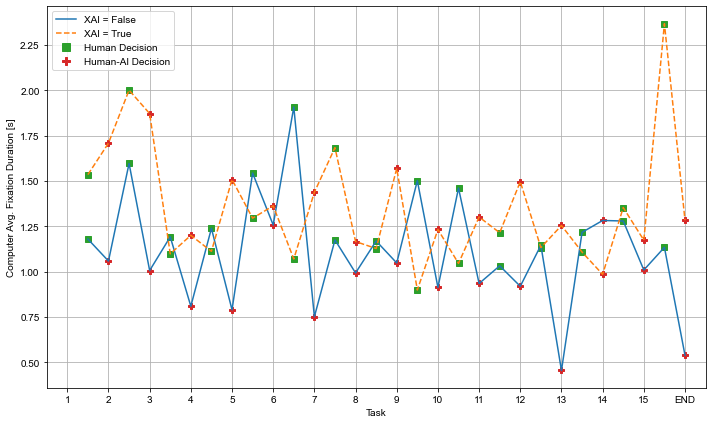

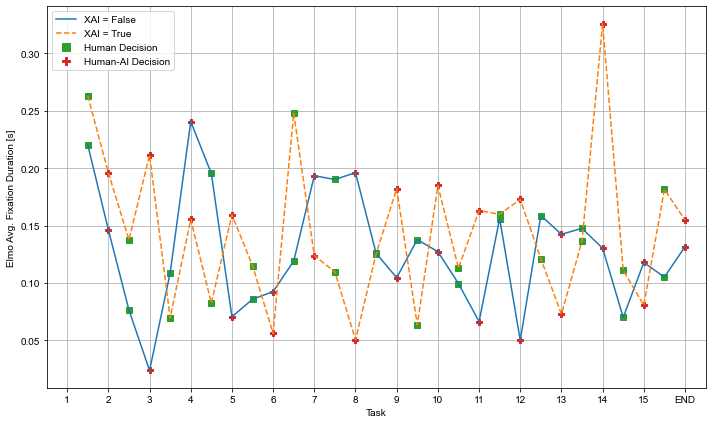

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
condition_o = {'O20', 'O21', 'O22', 'O24', 'O25', 'O26','O27', 'O28','O29','O30','O31','O32','O33','O34'}
condition_ox = {'OX20', 'OX21', 'OX22','OX23', 'OX24', 'OX25', 'OX26','OX27', 'OX28','OX29','OX31','OX32','OX33','OX34'}
plt.rcParams['font.family'] = 'sans-serif'  # Set global font to sans-serif
plt.rcParams['font.sans-serif'] = 'Arial'  # Specify the font name explicitly

file3 = 'interval_data_with_average_durations.csv'
df = pd.read_csv(file3)
o_data = df[df['id'].isin(condition_o)]
ox_data = df[df['id'].isin(condition_ox)]

task = o_data['task']

def plot_average_duration_over_task(o_data, ox_data):
    # task is values from -1 to 15
    N = 14
    task = o_data['task']
    o_array_fixation_durations = []
    o_array_fixation_durations_elmo = []
    ox_array_fixation_durations = []
    ox_array_fixation_durations_elmo = []
    section_interval = 32
    for j in range(0, section_interval):
        o_fixation_duration = 0
        o_fixation_duration_elmo = 0
        ox_fixation_duration = 0
        ox_fixation_duration_elmo = 0

        for i in range(0, len(task), section_interval):
            
            o_fixation_duration += o_data['fixation_durations'][i+j]
            o_fixation_duration_elmo += o_data['fixation_durations_elmo'][i+j]
            ox_fixation_duration += ox_data['fixation_durations'][i+j+len(task)]
            ox_fixation_duration_elmo += ox_data['fixation_durations_elmo'][i+j+len(task)]

        average_o_fixation_duration = o_fixation_duration / N
        average_o_fixation_duration_elmo = o_fixation_duration_elmo / N
        average_ox_fixation_duration = ox_fixation_duration / N
        average_ox_fixation_duration_elmo = ox_fixation_duration_elmo / N

        o_array_fixation_durations.append(average_o_fixation_duration)
        o_array_fixation_durations_elmo.append(average_o_fixation_duration_elmo)
        ox_array_fixation_durations.append(average_ox_fixation_duration)
        ox_array_fixation_durations_elmo.append(average_ox_fixation_duration_elmo)
    # Create the plot
    intro = -2
    tutorial = 0
    test = np.linspace(1.5, 16, 30)
    # add together intro,tutorial and test
    task = np.concatenate((np.array([intro, tutorial]), test))
    positions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'END']


    plt.figure(figsize=(10, 6))

    # Plot data with alternating markers
    for i in range(2, len(task), 1):
        if i % 2 == 0:
            marker = "s"
            label = "Human"
            color = "tab:green"
        else:
            marker = "P"
            label = "Human-AI"
            color = "tab:red"
        plt.plot(task[i], o_array_fixation_durations[i], marker=marker, color=color, label=label)
        plt.plot(task[i], ox_array_fixation_durations[i], marker=marker, color=color, label=label)

    plt.plot(task[2:], o_array_fixation_durations[2:], color='tab:blue', label='O', linestyle = '-')
    plt.plot(task[2:], ox_array_fixation_durations[2:], color='tab:orange', label='OX', linestyle = '--')

    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
        plt.Line2D([], [], marker='s', color='tab:green', linestyle='None', markersize=8, label='Human Decision'),
        plt.Line2D([], [], marker='P', color='tab:red', linestyle='None', markersize=8, label='Human-AI Decision'),
    ]
    plt.legend(handles=handles)
    
    plt.xlim(0.5, 16.5)

    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Computer Avg. Fixation Duration [s]')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/computer_average_fixation_durations_over_decision_no_tutorial.png', dpi=1600, bbox_inches='tight')

    plt.figure(figsize=(10, 6))

    # Plot data with alternating markers
    for i in range(2, len(task), 1):
        if i % 2 == 0:
            marker = "s"
            label = "Human"
            color = "tab:green"
        else:
            marker = "P"
            label = "Human-AI"
            color = "tab:red"
        plt.plot(task[i], o_array_fixation_durations_elmo[i], marker=marker, color=color, label=label)
        plt.plot(task[i], ox_array_fixation_durations_elmo[i], marker=marker, color=color, label=label)
    plt.plot(task[2:], o_array_fixation_durations_elmo[2:], color='tab:blue', linestyle = '-')
    plt.plot(task[2:], ox_array_fixation_durations_elmo[2:], color='tab:orange', linestyle = '--')

    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
        plt.Line2D([], [], marker='s', color='tab:green', linestyle='None', markersize=8, label='Human Decision'),
        plt.Line2D([], [], marker='P', color='tab:red', linestyle='None', markersize=8, label='Human-AI Decision'),
    ]
    plt.legend(handles=handles)
    
    plt.xlim(0.5, 16.5)
    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Elmo Avg. Fixation Duration [s]')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/elmo_average_fixation_durations_over_decision_without_tutorial.png', dpi=1600, bbox_inches='tight')
    plt.show()
    
plot_average_duration_over_task(o_data, ox_data)

### Average Fixation Count By Decision Division

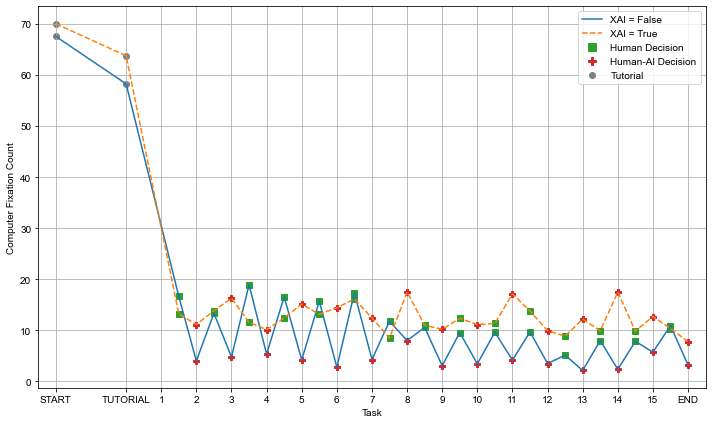

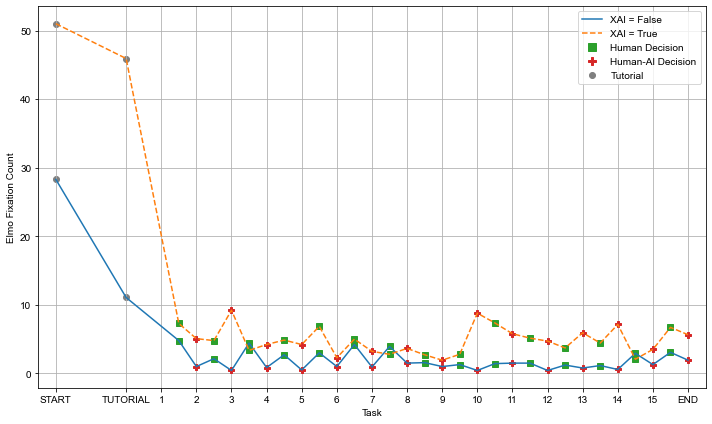

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
condition_o = {'O20', 'O21', 'O22', 'O24', 'O25', 'O26','O27', 'O28','O29','O30','O31','O32','O33','O34'}
condition_ox = {'OX20', 'OX21', 'OX22','OX23', 'OX24', 'OX25', 'OX26','OX27', 'OX28','OX29','OX31','OX32','OX33','OX34'}
plt.rcParams['font.family'] = 'sans-serif'  # Set global font to sans-serif
plt.rcParams['font.sans-serif'] = 'Arial'  # Specify the font name explicitly

file3 = 'fixation_data_by_dual_decision.csv'
df = pd.read_csv(file3)
o_data = df[df['id'].isin(condition_o)]
ox_data = df[df['id'].isin(condition_ox)]

task = o_data['task']

def plot_average_count_over_task(o_data, ox_data):
    # task is values from -1 to 15
    N = 14
    task = o_data['task']
    o_array_fixation_counts = []
    o_array_fixation_counts_elmo = []
    ox_array_fixation_counts = []
    ox_array_fixation_counts_elmo = []
    section_interval = 32
    for j in range(0, section_interval):
        o_fixation_count = 0
        o_fixation_count_elmo = 0
        ox_fixation_count = 0
        ox_fixation_count_elmo = 0
        for i in range(0, len(task), section_interval):
            o_fixation_count += o_data['fixation_counts'][i+j]
            o_fixation_count_elmo += o_data['fixations_counts_elmo'][i+j]
            ox_fixation_count += ox_data['fixation_counts'][i+j+len(task)]
            ox_fixation_count_elmo += ox_data['fixations_counts_elmo'][i+j+len(task)]
        average_o_fixation_count = o_fixation_count / N
        average_o_fixation_count_elmo = o_fixation_count_elmo / N
        average_ox_fixation_count = ox_fixation_count / N
        average_ox_fixation_count_elmo = ox_fixation_count_elmo / N
        o_array_fixation_counts.append(average_o_fixation_count)
        o_array_fixation_counts_elmo.append(average_o_fixation_count_elmo)
        ox_array_fixation_counts.append(average_ox_fixation_count)
        ox_array_fixation_counts_elmo.append(average_ox_fixation_count_elmo)

    # Create the plot
    intro = -2
    tutorial = 0
    test = np.linspace(1.5, 16, 30)
    # add together intro,tutorial and test
    task = np.concatenate((np.array([intro, tutorial]), test))
    positions = [-2, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    labels = ['START', 'TUTORIAL', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'END']


    plt.figure(figsize=(10, 6))
    plt.scatter(task[0], o_array_fixation_counts[0], marker = "o", color='tab:gray')
    plt.scatter(task[0], ox_array_fixation_counts[0], marker = "o", color='tab:gray')
    plt.scatter(task[1], o_array_fixation_counts[1], marker = "o", color='tab:gray')
    plt.scatter(task[1], ox_array_fixation_counts[1], marker = "o", color='tab:gray')

    # Plot data with alternating markers
    for i in range(2, len(task), 1):
        if i % 2 == 0:
            marker = "s"
            label = "Human"
            color = "tab:green"
        else:
            marker = "P"
            label = "Human-AI"
            color = "tab:red"
        plt.plot(task[i], o_array_fixation_counts[i], marker=marker, color=color, label=label)
        plt.plot(task[i], ox_array_fixation_counts[i], marker=marker, color=color, label=label)

    plt.plot(task, o_array_fixation_counts, color='tab:blue', label='O', linestyle = '-')
    plt.plot(task, ox_array_fixation_counts, color='tab:orange', label='OX', linestyle = '--')

    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
        plt.Line2D([], [], marker='s', color='tab:green', linestyle='None', markersize=8, label='Human Decision'),
        plt.Line2D([], [], marker='P', color='tab:red', linestyle='None', markersize=8, label='Human-AI Decision'),
        plt.Line2D([], [], marker='o', color='tab:gray', linestyle='None', markersize=6, label='Tutorial'),
    ]
    plt.legend(handles=handles)
    
    plt.xlim(-2.5, 16.5)

    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Computer Fixation Count')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/computer_average_fixation_count_over_decision.png', dpi=1600, bbox_inches='tight')

    plt.figure(figsize=(10, 6))

    plt.scatter(task[0], o_array_fixation_counts_elmo[0], marker = "o", color='tab:gray')
    plt.scatter(task[0], ox_array_fixation_counts_elmo[0], marker = "o", color='tab:gray')
    plt.scatter(task[1], o_array_fixation_counts_elmo[1], marker = "o", color='tab:gray')
    plt.scatter(task[1], ox_array_fixation_counts_elmo[1], marker = "o", color='tab:gray')

    # Plot data with alternating markers
    for i in range(2, len(task), 1):
        if i % 2 == 0:
            marker = "s"
            label = "Human"
            color = "tab:green"
        else:
            marker = "P"
            label = "Human-AI"
            color = "tab:red"
        plt.plot(task[i], o_array_fixation_counts_elmo[i], marker=marker, color=color, label=label)
        plt.plot(task[i], ox_array_fixation_counts_elmo[i], marker=marker, color=color, label=label)
    plt.plot(task, o_array_fixation_counts_elmo, color='tab:blue', linestyle = '-')
    plt.plot(task, ox_array_fixation_counts_elmo, color='tab:orange', linestyle = '--')

    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
        plt.Line2D([], [], marker='s', color='tab:green', linestyle='None', markersize=8, label='Human Decision'),
        plt.Line2D([], [], marker='P', color='tab:red', linestyle='None', markersize=8, label='Human-AI Decision'),
        plt.Line2D([], [], marker='o', color='tab:gray', linestyle='None', markersize=6, label='Tutorial'),
    ]
    plt.legend(handles=handles)
    
    plt.xlim(-2.5, 16.5)
    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Elmo Fixation Count')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/elmo_average_fixation_counts_over_decision.png', dpi=1600, bbox_inches='tight')
    plt.show()
    
plot_average_count_over_task(o_data, ox_data)


### Average Fixation Duration without START/TUTORIAL


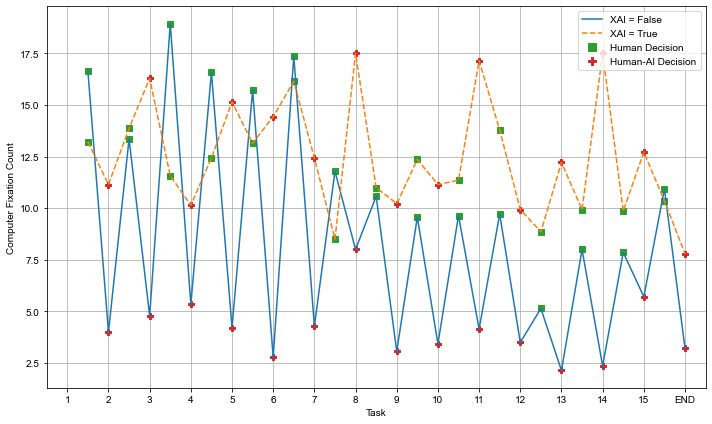

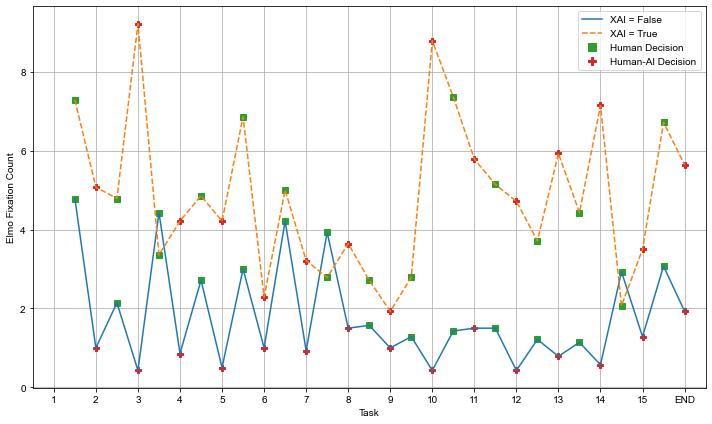

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
condition_o = {'O20', 'O21', 'O22', 'O24', 'O25', 'O26','O27', 'O28','O29','O30','O31','O32','O33','O34'}
condition_ox = {'OX20', 'OX21', 'OX22','OX23', 'OX24', 'OX25', 'OX26','OX27', 'OX28','OX29','OX31','OX32','OX33','OX34'}
plt.rcParams['font.family'] = 'sans-serif'  # Set global font to sans-serif
plt.rcParams['font.sans-serif'] = 'Arial'  # Specify the font name explicitly

file3 = 'fixation_data_by_dual_decision.csv'
df = pd.read_csv(file3)
o_data = df[df['id'].isin(condition_o)]
ox_data = df[df['id'].isin(condition_ox)]

task = o_data['task']

def plot_average_count_over_task(o_data, ox_data):
    # task is values from -1 to 15
    N = 14
    task = o_data['task']
    o_array_fixation_counts = []
    o_array_fixation_counts_elmo = []
    ox_array_fixation_counts = []
    ox_array_fixation_counts_elmo = []
    section_interval = 32
    for j in range(0, section_interval):
        o_fixation_count = 0
        o_fixation_count_elmo = 0
        ox_fixation_count = 0
        ox_fixation_count_elmo = 0
        for i in range(0, len(task), section_interval):
            o_fixation_count += o_data['fixation_counts'][i+j]
            o_fixation_count_elmo += o_data['fixations_counts_elmo'][i+j]
            ox_fixation_count += ox_data['fixation_counts'][i+j+len(task)]
            ox_fixation_count_elmo += ox_data['fixations_counts_elmo'][i+j+len(task)]
        average_o_fixation_count = o_fixation_count / N
        average_o_fixation_count_elmo = o_fixation_count_elmo / N
        average_ox_fixation_count = ox_fixation_count / N
        average_ox_fixation_count_elmo = ox_fixation_count_elmo / N
        o_array_fixation_counts.append(average_o_fixation_count)
        o_array_fixation_counts_elmo.append(average_o_fixation_count_elmo)
        ox_array_fixation_counts.append(average_ox_fixation_count)
        ox_array_fixation_counts_elmo.append(average_ox_fixation_count_elmo)

    # Create the plot
    intro = -2
    tutorial = 0
    test = np.linspace(1.5, 16, 30)
    # add together intro,tutorial and test
    task = np.concatenate((np.array([intro, tutorial]), test))
    positions = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
    labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 'END']
    plt.figure(figsize=(10, 6))
    # Plot data with alternating markers
    for i in range(2, len(task), 1):
        if i % 2 == 0:
            marker = "s"
            label = "Human"
            color = "tab:green"
        else:
            marker = "P"
            label = "Human-AI"
            color = "tab:red"
        plt.plot(task[i], o_array_fixation_counts[i], marker=marker, color=color, label=label)
        plt.plot(task[i], ox_array_fixation_counts[i], marker=marker, color=color, label=label)

    plt.plot(task[2:], o_array_fixation_counts[2:], color='tab:blue', label='O', linestyle = '-')
    plt.plot(task[2:], ox_array_fixation_counts[2:], color='tab:orange', label='OX', linestyle = '--')

    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
        plt.Line2D([], [], marker='s', color='tab:green', linestyle='None', markersize=8, label='Human Decision'),
        plt.Line2D([], [], marker='P', color='tab:red', linestyle='None', markersize=8, label='Human-AI Decision'),
    ]
    plt.legend(handles=handles)
    
    plt.xlim(0.5, 16.5)

    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Computer Fixation Count')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/computer_average_fixation_count_over_decision_no_tutorial.png', dpi=1600, bbox_inches='tight')

    plt.figure(figsize=(10, 6))

    # Plot data with alternating markers
    for i in range(2, len(task), 1):
        if i % 2 == 0:
            marker = "s"
            label = "Human"
            color = "tab:green"
        else:
            marker = "P"
            label = "Human-AI"
            color = "tab:red"
        plt.plot(task[i], o_array_fixation_counts_elmo[i], marker=marker, color=color, label=label)
        plt.plot(task[i], ox_array_fixation_counts_elmo[i], marker=marker, color=color, label=label)
    plt.plot(task[2:], o_array_fixation_counts_elmo[2:], color='tab:blue', linestyle = '-')
    plt.plot(task[2:], ox_array_fixation_counts_elmo[2:], color='tab:orange', linestyle = '--')

    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
        plt.Line2D([], [], marker='s', color='tab:green', linestyle='None', markersize=8, label='Human Decision'),
        plt.Line2D([], [], marker='P', color='tab:red', linestyle='None', markersize=8, label='Human-AI Decision'),
    ]
    plt.legend(handles=handles)
    
    plt.xlim(0.5, 16.5)
    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Elmo Fixation Count')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/elmo_average_fixation_counts_over_decision_no_tutorial.png', dpi=1600, bbox_inches='tight')
    plt.show()
    
plot_average_count_over_task(o_data, ox_data)


## Trust Decision-Making
### Tasks 1-5 = Early trust build, Task 5 = Trust breach, 6-10 = early trust recovery, 10 = Trust Breach, 11-13 = late trust recovery, 13 = trust breach, 14-15 = final trust recovery

### Average Fixation Duration

Loop: 0
Loop: 1


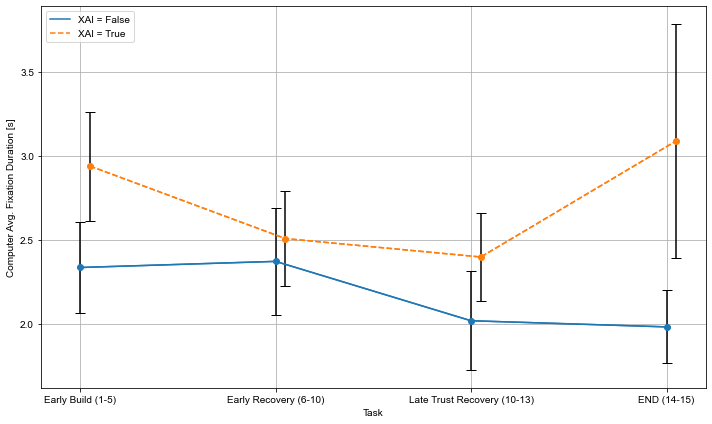

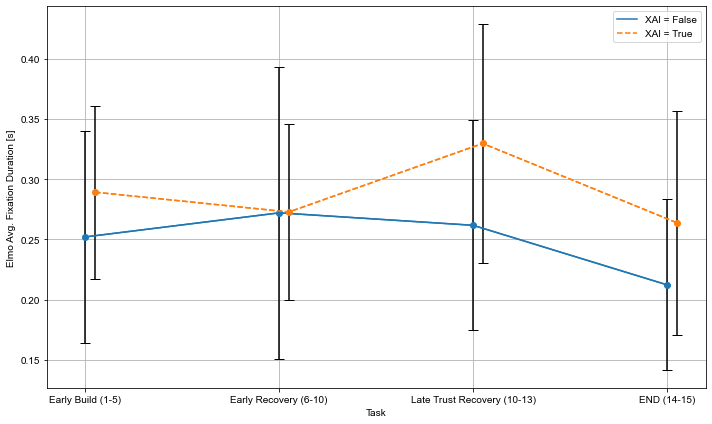

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
condition_o = {'O20', 'O21', 'O22', 'O24', 'O25', 'O26','O27', 'O28','O29','O30','O31','O32','O33','O34'}
condition_ox = {'OX20', 'OX21', 'OX22','OX23', 'OX24', 'OX25', 'OX26','OX27', 'OX28','OX29','OX31','OX32','OX33','OX34'}
plt.rcParams['font.family'] = 'sans-serif'  # Set global font to sans-serif
plt.rcParams['font.sans-serif'] = 'Arial'  # Specify the font name explicitly

file3 = 'interval_data_with_average_durations.csv'
df = pd.read_csv(file3)
o_data = df[df['id'].isin(condition_o)]
ox_data = df[df['id'].isin(condition_ox)]

task = o_data['task']

def plot_average_count_over_task(o_data, ox_data):
    # task is values from -1 to 15
    N = 14
    task = o_data['task']
    o_array_fixation_counts = []
    o_array_fixation_counts_elmo = []
    ox_array_fixation_counts = []
    ox_array_fixation_counts_elmo = []
    o_array_fixation_counts_sem = []
    o_array_fixation_counts_elmo_sem = []
    ox_array_fixation_counts_sem = []
    ox_array_fixation_counts_elmo_sem = []
    section_interval = 32
    # introduction and tutorial
    for i in range(0, 2):
        o_fixation_count = []
        o_fixation_count_elmo = []
        ox_fixation_count = []
        ox_fixation_count_elmo = []
        print('Loop:', i)
        for j in range(0, len(task), section_interval):
            o_fixation_count.append(o_data['fixation_durations'][i+j])
            o_fixation_count_elmo.append(o_data['fixation_durations_elmo'][i+j])
            ox_fixation_count.append(ox_data['fixation_durations'][i+j+len(task)])
            ox_fixation_count_elmo.append(ox_data['fixation_durations_elmo'][i+j+len(task)])
        # Calculate mean and SEM
        average_o_fixation_count = np.mean(o_fixation_count)
        sem_o_fixation_count = np.std(o_fixation_count, ddof=1) / np.sqrt(len(o_fixation_count))
        average_o_fixation_count_elmo = np.mean(o_fixation_count_elmo)
        sem_o_fixation_count_elmo = np.std(o_fixation_count_elmo, ddof=1) / np.sqrt(len(o_fixation_count_elmo))
        average_ox_fixation_count = np.mean(ox_fixation_count)
        sem_ox_fixation_count = np.std(ox_fixation_count, ddof=1) / np.sqrt(len(ox_fixation_count))
        average_ox_fixation_count_elmo = np.mean(ox_fixation_count_elmo)
        sem_ox_fixation_count_elmo = np.std(ox_fixation_count_elmo, ddof=1) / np.sqrt(len(ox_fixation_count_elmo))

        o_array_fixation_counts.append(average_o_fixation_count)
        o_array_fixation_counts_elmo.append(average_o_fixation_count_elmo)
        ox_array_fixation_counts.append(average_ox_fixation_count)
        ox_array_fixation_counts_elmo.append(average_ox_fixation_count_elmo)
        o_array_fixation_counts_sem.append(sem_o_fixation_count)
        o_array_fixation_counts_elmo_sem.append(sem_o_fixation_count_elmo)
        ox_array_fixation_counts_sem.append(sem_ox_fixation_count)
        ox_array_fixation_counts_elmo_sem.append(sem_ox_fixation_count_elmo)


    # for task 1-5, 6-10, 11-13, 14-15
    o_task_5_counts = []
    o_task_5_counts_elmo = []
    ox_task_5_counts = []
    ox_task_5_counts_elmo = []
    o_task_6_counts = []
    o_task_6_counts_elmo = []
    ox_task_6_counts = []
    ox_task_6_counts_elmo = []

    o_task_11_counts = []
    o_task_11_counts_elmo = []
    ox_task_11_counts = []
    ox_task_11_counts_elmo = []

    o_task_14_counts = []
    o_task_14_counts_elmo = []
    ox_task_14_counts = []
    ox_task_14_counts_elmo = []

    for j in range(2, len(task), section_interval):
        o_fixation_count_5 = 0
        o_fixation_count_elmo_5 = 0
        ox_fixation_count_5 = 0
        ox_fixation_count_elmo_5 = 0

        o_fixation_count_6 = 0
        o_fixation_count_elmo_6 = 0
        ox_fixation_count_6 = 0
        ox_fixation_count_elmo_6 = 0

        o_fixation_count_11 = 0
        o_fixation_count_elmo_11 = 0
        ox_fixation_count_11 = 0
        ox_fixation_count_elmo_11 = 0

        o_fixation_count_14 = 0
        o_fixation_count_elmo_14 = 0
        ox_fixation_count_14 = 0
        ox_fixation_count_elmo_14 = 0
        # print('Loop:', j)
        for i in range(0, 10): # tasks 1 - 5
            o_fixation_count_5 += (o_data['fixation_durations'][i+j])
            o_fixation_count_elmo_5 += (o_data['fixation_durations_elmo'][i+j])
            ox_fixation_count_5 += (ox_data['fixation_durations'][i+j+len(task)])
            ox_fixation_count_elmo_5 += (ox_data['fixation_durations_elmo'][i+j+len(task)])

        for i in range(10, 20): # tasks 6 - 10
            o_fixation_count_6 += (o_data['fixation_durations'][i+j])
            o_fixation_count_elmo_6 += (o_data['fixation_durations_elmo'][i+j])
            ox_fixation_count_6 += (ox_data['fixation_durations'][i+j+len(task)])
            ox_fixation_count_elmo_6 += (ox_data['fixation_durations_elmo'][i+j+len(task)])
        for i in range(20,26): # tasks 11 - 13
            o_fixation_count_11 += (o_data['fixation_durations'][i+j])
            o_fixation_count_elmo_11 += (o_data['fixation_durations_elmo'][i+j])
            ox_fixation_count_11 += (ox_data['fixation_durations'][i+j+len(task)])
            ox_fixation_count_elmo_11 += (ox_data['fixation_durations_elmo'][i+j+len(task)])         
        for i in range(26, 30): # tasks 14 - 15
            o_fixation_count_14 += (o_data['fixation_durations'][i+j])
            o_fixation_count_elmo_14 += (o_data['fixation_durations_elmo'][i+j])
            ox_fixation_count_14 += (ox_data['fixation_durations'][i+j+len(task)])
            ox_fixation_count_elmo_14 += (ox_data['fixation_durations_elmo'][i+j+len(task)])

        # get average count of all tasks
        average_o_fixation_count = o_fixation_count_5 / 5 
        average_o_fixation_count_elmo = o_fixation_count_elmo_5 / 5 
        average_ox_fixation_count = ox_fixation_count_5 / 5
        average_ox_fixation_count_elmo = ox_fixation_count_elmo_5 / 5

        o_task_5_counts.append(average_o_fixation_count)
        o_task_5_counts_elmo.append(average_o_fixation_count_elmo)
        ox_task_5_counts.append(average_ox_fixation_count)
        ox_task_5_counts_elmo.append(average_ox_fixation_count_elmo)

        average_o_fixation_count = o_fixation_count_6 / 5
        average_o_fixation_count_elmo = o_fixation_count_elmo_6 / 5
        average_ox_fixation_count = ox_fixation_count_6 /5
        average_ox_fixation_count_elmo = ox_fixation_count_elmo_6 / 5

        o_task_6_counts.append(average_o_fixation_count)
        o_task_6_counts_elmo.append(average_o_fixation_count_elmo)
        ox_task_6_counts.append(average_ox_fixation_count)
        ox_task_6_counts_elmo.append(average_ox_fixation_count_elmo)

        average_o_fixation_count = o_fixation_count_11 / 3
        average_o_fixation_count_elmo = o_fixation_count_elmo_11 / 3
        average_ox_fixation_count = ox_fixation_count_11 / 3
        average_ox_fixation_count_elmo = ox_fixation_count_elmo_11 / 3

        o_task_11_counts.append(average_o_fixation_count)
        o_task_11_counts_elmo.append(average_o_fixation_count_elmo)
        ox_task_11_counts.append(average_ox_fixation_count)
        ox_task_11_counts_elmo.append(average_ox_fixation_count_elmo)

        average_o_fixation_count = o_fixation_count_14 / 2 
        average_o_fixation_count_elmo = o_fixation_count_elmo_14 / 2
        average_ox_fixation_count = ox_fixation_count_14 / 2
        average_ox_fixation_count_elmo = ox_fixation_count_elmo_14 / 2

        o_task_14_counts.append(average_o_fixation_count)
        o_task_14_counts_elmo.append(average_o_fixation_count_elmo)
        ox_task_14_counts.append(average_ox_fixation_count)
        ox_task_14_counts_elmo.append(average_ox_fixation_count_elmo)

    # calculate mean and SEM
    o_array_fixation_counts.append(np.mean(o_task_5_counts))
    o_array_fixation_counts_elmo.append(np.mean(o_task_5_counts_elmo))
    ox_array_fixation_counts.append(np.mean(ox_task_5_counts))
    ox_array_fixation_counts_elmo.append(np.mean(ox_task_5_counts_elmo))
    o_array_fixation_counts_sem.append(np.std(o_task_5_counts, ddof=1) / np.sqrt(len(o_task_5_counts)))
    o_array_fixation_counts_elmo_sem.append(np.std(o_task_5_counts_elmo, ddof=1) / np.sqrt(len(o_task_5_counts_elmo)))
    ox_array_fixation_counts_sem.append(np.std(ox_task_5_counts, ddof=1) / np.sqrt(len(ox_task_5_counts)))
    ox_array_fixation_counts_elmo_sem.append(np.std(ox_task_5_counts_elmo, ddof=1) / np.sqrt(len(ox_task_5_counts_elmo)))

    o_array_fixation_counts.append(np.mean(o_task_6_counts))
    o_array_fixation_counts_elmo.append(np.mean(o_task_6_counts_elmo))
    ox_array_fixation_counts.append(np.mean(ox_task_6_counts))
    ox_array_fixation_counts_elmo.append(np.mean(ox_task_6_counts_elmo))
    o_array_fixation_counts_sem.append(np.std(o_task_6_counts, ddof=1) / np.sqrt(len(o_task_6_counts)))
    o_array_fixation_counts_elmo_sem.append(np.std(o_task_6_counts_elmo, ddof=1) / np.sqrt(len(o_task_6_counts_elmo)))

    ox_array_fixation_counts_sem.append(np.std(ox_task_6_counts, ddof=1) / np.sqrt(len(ox_task_6_counts)))
    ox_array_fixation_counts_elmo_sem.append(np.std(ox_task_6_counts_elmo, ddof=1) / np.sqrt(len(ox_task_6_counts_elmo)))

    o_array_fixation_counts.append(np.mean(o_task_11_counts))
    o_array_fixation_counts_elmo.append(np.mean(o_task_11_counts_elmo))
    ox_array_fixation_counts.append(np.mean(ox_task_11_counts))
    ox_array_fixation_counts_elmo.append(np.mean(ox_task_11_counts_elmo))
    o_array_fixation_counts_sem.append(np.std(o_task_11_counts, ddof=1) / np.sqrt(len(o_task_11_counts)))
    o_array_fixation_counts_elmo_sem.append(np.std(o_task_11_counts_elmo, ddof=1) / np.sqrt(len(o_task_11_counts_elmo)))
    ox_array_fixation_counts_sem.append(np.std(ox_task_11_counts, ddof=1) / np.sqrt(len(ox_task_11_counts)))
    ox_array_fixation_counts_elmo_sem.append(np.std(ox_task_11_counts_elmo, ddof=1) / np.sqrt(len(ox_task_11_counts_elmo)))

    o_array_fixation_counts.append(np.mean(o_task_14_counts))
    o_array_fixation_counts_elmo.append(np.mean(o_task_14_counts_elmo))
    ox_array_fixation_counts.append(np.mean(ox_task_14_counts))
    ox_array_fixation_counts_elmo.append(np.mean(ox_task_14_counts_elmo))
    o_array_fixation_counts_sem.append(np.std(o_task_14_counts, ddof=1) / np.sqrt(len(o_task_14_counts)))
    o_array_fixation_counts_elmo_sem.append(np.std(o_task_14_counts_elmo, ddof=1) / np.sqrt(len(o_task_14_counts_elmo)))
    ox_array_fixation_counts_sem.append(np.std(ox_task_14_counts, ddof=1) / np.sqrt(len(ox_task_14_counts)))
    ox_array_fixation_counts_elmo_sem.append(np.std(ox_task_14_counts_elmo, ddof=1) / np.sqrt(len(ox_task_14_counts_elmo)))

    # Create the plot
    intro = -2
    tutorial = 0
    test = [5, 10, 15, 20]
    # add together intro,tutorial and test
    task = np.concatenate((np.array([intro, tutorial]), test))
    positions = [5, 10, 15, 20]
    labels = ['Early Build (1-5)', 'Early Recovery (6-10)', 'Late Trust Recovery (10-13)', 'END (14-15)']
    task_ox = [-2, 0, 5.25, 10.25, 15.25, 20.25] # so they don't overlap
    
    plt.figure(figsize=(10, 6))
    plt.errorbar(task[2:], o_array_fixation_counts[2:], o_array_fixation_counts_sem[2:], color='tab:blue', marker = 'o', ls = '-', capsize=5, capthick=1, ecolor='black')
    plt.errorbar(task_ox[2:], ox_array_fixation_counts[2:], ox_array_fixation_counts_sem[2:], color='tab:orange', marker = 'o', ls = '--', capsize=5, capthick=1, ecolor='black')
    plt.plot(task[2:], o_array_fixation_counts[2:], color='tab:blue', linestyle = '-')
    plt.plot(task_ox[2:], ox_array_fixation_counts[2:], color='tab:orange', linestyle = '--')

    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
    ]

    plt.legend(handles=handles)
    
    plt.xlim(4, 21)

    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Computer Avg. Fixation Duration [s]')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/computer_average_fixation_duration_dual_decision_with_sem.png', dpi=1600, bbox_inches='tight')

    plt.figure(figsize=(10, 6))

    # plt.scatter(task[0], o_array_fixation_counts_elmo[0], marker = "o", color='tab:gray')
    # plt.scatter(task[0], ox_array_fixation_counts_elmo[0], marker = "o", color='tab:gray')
    # plt.scatter(task[1], o_array_fixation_counts_elmo[1], marker = "o", color='tab:gray')
    # plt.scatter(task[1], ox_array_fixation_counts_elmo[1], marker = "o", color='tab:gray')

    plt.errorbar(task[2:], o_array_fixation_counts_elmo[2:], o_array_fixation_counts_elmo_sem[2:], color='tab:blue',  ls='-', marker='o', capsize=5, capthick=1, ecolor='black')
    plt.errorbar(task_ox[2:], ox_array_fixation_counts_elmo[2:], ox_array_fixation_counts_elmo_sem[2:], color='tab:orange', marker = 'o', ls = '--', capsize=5, capthick=1, ecolor='black')
    plt.plot(task[2:], o_array_fixation_counts_elmo[2:], color='tab:blue', linestyle = '-')
    plt.plot(task_ox[2:], ox_array_fixation_counts_elmo[2:], color='tab:orange', linestyle = '--')


    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
    ]
    plt.legend(handles=handles)
    
    plt.xlim(4, 21)
    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Elmo Avg. Fixation Duration [s]')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/elmo_average_fixation_duration_over_dual_decision_with_sem.png', dpi=1600, bbox_inches='tight')
    plt.show()
    
plot_average_count_over_task(o_data, ox_data)


### Average Fixation Count

Loop: 0
Loop: 1


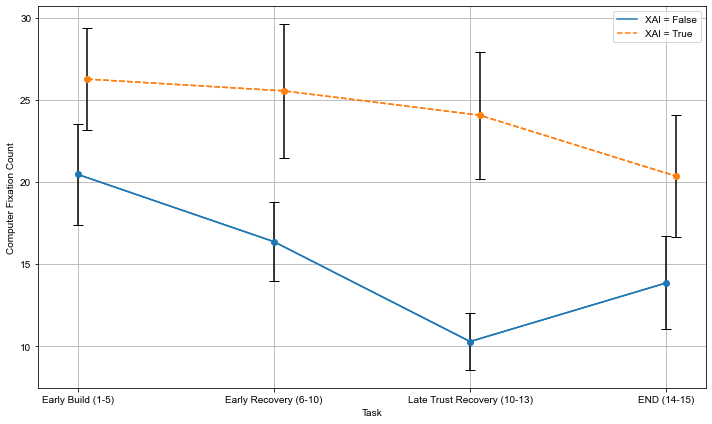

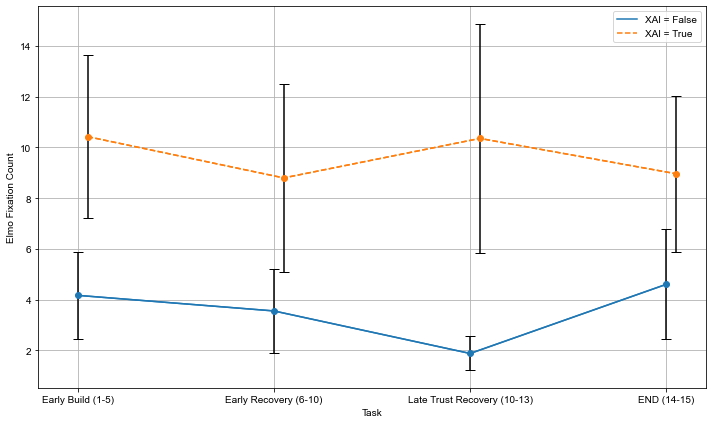

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
condition_o = {'O20', 'O21', 'O22', 'O24', 'O25', 'O26','O27', 'O28','O29','O30','O31','O32','O33','O34'}
condition_ox = {'OX20', 'OX21', 'OX22','OX23', 'OX24', 'OX25', 'OX26','OX27', 'OX28','OX29','OX31','OX32','OX33','OX34'}
plt.rcParams['font.family'] = 'sans-serif'  # Set global font to sans-serif
plt.rcParams['font.sans-serif'] = 'Arial'  # Specify the font name explicitly

file3 = 'interval_data_with_average_durations.csv'
df = pd.read_csv(file3)
o_data = df[df['id'].isin(condition_o)]
ox_data = df[df['id'].isin(condition_ox)]

task = o_data['task']

def plot_average_count_over_task(o_data, ox_data):
    # task is values from -1 to 15
    N = 14
    task = o_data['task']
    o_array_fixation_counts = []
    o_array_fixation_counts_elmo = []
    ox_array_fixation_counts = []
    ox_array_fixation_counts_elmo = []
    o_array_fixation_counts_sem = []
    o_array_fixation_counts_elmo_sem = []
    ox_array_fixation_counts_sem = []
    ox_array_fixation_counts_elmo_sem = []
    section_interval = 32
    # introduction and tutorial
    for i in range(0, 2):
        o_fixation_count = []
        o_fixation_count_elmo = []
        ox_fixation_count = []
        ox_fixation_count_elmo = []
        print('Loop:', i)
        for j in range(0, len(task), section_interval):
            o_fixation_count.append(o_data['fixation_counts'][i+j])
            o_fixation_count_elmo.append(o_data['fixations_counts_elmo'][i+j])
            ox_fixation_count.append(ox_data['fixation_counts'][i+j+len(task)])
            ox_fixation_count_elmo.append(ox_data['fixations_counts_elmo'][i+j+len(task)])
        # Calculate mean and SEM
        average_o_fixation_count = np.mean(o_fixation_count)
        sem_o_fixation_count = np.std(o_fixation_count, ddof=1) / np.sqrt(len(o_fixation_count))
        average_o_fixation_count_elmo = np.mean(o_fixation_count_elmo)
        sem_o_fixation_count_elmo = np.std(o_fixation_count_elmo, ddof=1) / np.sqrt(len(o_fixation_count_elmo))
        average_ox_fixation_count = np.mean(ox_fixation_count)
        sem_ox_fixation_count = np.std(ox_fixation_count, ddof=1) / np.sqrt(len(ox_fixation_count))
        average_ox_fixation_count_elmo = np.mean(ox_fixation_count_elmo)
        sem_ox_fixation_count_elmo = np.std(ox_fixation_count_elmo, ddof=1) / np.sqrt(len(ox_fixation_count_elmo))

        o_array_fixation_counts.append(average_o_fixation_count)
        o_array_fixation_counts_elmo.append(average_o_fixation_count_elmo)
        ox_array_fixation_counts.append(average_ox_fixation_count)
        ox_array_fixation_counts_elmo.append(average_ox_fixation_count_elmo)
        o_array_fixation_counts_sem.append(sem_o_fixation_count)
        o_array_fixation_counts_elmo_sem.append(sem_o_fixation_count_elmo)
        ox_array_fixation_counts_sem.append(sem_ox_fixation_count)
        ox_array_fixation_counts_elmo_sem.append(sem_ox_fixation_count_elmo)


    # for task 1-5, 6-10, 11-13, 14-15
    o_task_5_counts = []
    o_task_5_counts_elmo = []
    ox_task_5_counts = []
    ox_task_5_counts_elmo = []
    o_task_6_counts = []
    o_task_6_counts_elmo = []
    ox_task_6_counts = []
    ox_task_6_counts_elmo = []

    o_task_11_counts = []
    o_task_11_counts_elmo = []
    ox_task_11_counts = []
    ox_task_11_counts_elmo = []

    o_task_14_counts = []
    o_task_14_counts_elmo = []
    ox_task_14_counts = []
    ox_task_14_counts_elmo = []

    for j in range(2, len(task), section_interval):
        o_fixation_count_5 = 0
        o_fixation_count_elmo_5 = 0
        ox_fixation_count_5 = 0
        ox_fixation_count_elmo_5 = 0

        o_fixation_count_6 = 0
        o_fixation_count_elmo_6 = 0
        ox_fixation_count_6 = 0
        ox_fixation_count_elmo_6 = 0

        o_fixation_count_11 = 0
        o_fixation_count_elmo_11 = 0
        ox_fixation_count_11 = 0
        ox_fixation_count_elmo_11 = 0

        o_fixation_count_14 = 0
        o_fixation_count_elmo_14 = 0
        ox_fixation_count_14 = 0
        ox_fixation_count_elmo_14 = 0
        # print('Loop:', j)
        for i in range(0, 10): # tasks 1 - 5
            o_fixation_count_5 += (o_data['fixation_counts'][i+j])
            o_fixation_count_elmo_5 += (o_data['fixations_counts_elmo'][i+j])
            ox_fixation_count_5 += (ox_data['fixation_counts'][i+j+len(task)])
            ox_fixation_count_elmo_5 += (ox_data['fixations_counts_elmo'][i+j+len(task)])

        for i in range(10, 20): # tasks 6 - 10
            o_fixation_count_6 += (o_data['fixation_counts'][i+j])
            o_fixation_count_elmo_6 += (o_data['fixations_counts_elmo'][i+j])
            ox_fixation_count_6 += (ox_data['fixation_counts'][i+j+len(task)])
            ox_fixation_count_elmo_6 += (ox_data['fixations_counts_elmo'][i+j+len(task)])
        for i in range(20,26): # tasks 11 - 13
            o_fixation_count_11 += (o_data['fixation_counts'][i+j])
            o_fixation_count_elmo_11 += (o_data['fixations_counts_elmo'][i+j])
            ox_fixation_count_11 += (ox_data['fixation_counts'][i+j+len(task)])
            ox_fixation_count_elmo_11 += (ox_data['fixations_counts_elmo'][i+j+len(task)])         
        for i in range(26, 30): # tasks 14 - 15
            o_fixation_count_14 += (o_data['fixation_counts'][i+j])
            o_fixation_count_elmo_14 += (o_data['fixations_counts_elmo'][i+j])
            ox_fixation_count_14 += (ox_data['fixation_counts'][i+j+len(task)])
            ox_fixation_count_elmo_14 += (ox_data['fixations_counts_elmo'][i+j+len(task)])

        # get average count of all tasks
        average_o_fixation_count = o_fixation_count_5 / 5
        average_o_fixation_count_elmo = o_fixation_count_elmo_5 / 5
        average_ox_fixation_count = ox_fixation_count_5 / 5 
        average_ox_fixation_count_elmo = ox_fixation_count_elmo_5 / 5

        o_task_5_counts.append(average_o_fixation_count)
        o_task_5_counts_elmo.append(average_o_fixation_count_elmo)
        ox_task_5_counts.append(average_ox_fixation_count)
        ox_task_5_counts_elmo.append(average_ox_fixation_count_elmo)

        average_o_fixation_count = o_fixation_count_6 / 5
        average_o_fixation_count_elmo = o_fixation_count_elmo_6 /5
        average_ox_fixation_count = ox_fixation_count_6 /5
        average_ox_fixation_count_elmo = ox_fixation_count_elmo_6 /5

        o_task_6_counts.append(average_o_fixation_count)
        o_task_6_counts_elmo.append(average_o_fixation_count_elmo)
        ox_task_6_counts.append(average_ox_fixation_count)
        ox_task_6_counts_elmo.append(average_ox_fixation_count_elmo)

        average_o_fixation_count = o_fixation_count_11 / 3
        average_o_fixation_count_elmo = o_fixation_count_elmo_11 /3
        average_ox_fixation_count = ox_fixation_count_11 /3
        average_ox_fixation_count_elmo = ox_fixation_count_elmo_11 /3

        o_task_11_counts.append(average_o_fixation_count)
        o_task_11_counts_elmo.append(average_o_fixation_count_elmo)
        ox_task_11_counts.append(average_ox_fixation_count)
        ox_task_11_counts_elmo.append(average_ox_fixation_count_elmo)

        average_o_fixation_count = o_fixation_count_14 / 2
        average_o_fixation_count_elmo = o_fixation_count_elmo_14 /2
        average_ox_fixation_count = ox_fixation_count_14 /2
        average_ox_fixation_count_elmo = ox_fixation_count_elmo_14 /2

        o_task_14_counts.append(average_o_fixation_count)
        o_task_14_counts_elmo.append(average_o_fixation_count_elmo)
        ox_task_14_counts.append(average_ox_fixation_count)
        ox_task_14_counts_elmo.append(average_ox_fixation_count_elmo)

    # calculate mean and SEM
    
    o_array_fixation_counts.append(np.mean(o_task_5_counts))
    o_array_fixation_counts_elmo.append(np.mean(o_task_5_counts_elmo))
    ox_array_fixation_counts.append(np.mean(ox_task_5_counts))
    ox_array_fixation_counts_elmo.append(np.mean(ox_task_5_counts_elmo))
    o_array_fixation_counts_sem.append(np.std(o_task_5_counts, ddof=1) / np.sqrt(len(o_task_5_counts)))
    o_array_fixation_counts_elmo_sem.append(np.std(o_task_5_counts_elmo, ddof=1) / np.sqrt(len(o_task_5_counts_elmo)))
    ox_array_fixation_counts_sem.append(np.std(ox_task_5_counts, ddof=1) / np.sqrt(len(ox_task_5_counts)))
    ox_array_fixation_counts_elmo_sem.append(np.std(ox_task_5_counts_elmo, ddof=1) / np.sqrt(len(ox_task_5_counts_elmo)))

    o_array_fixation_counts.append(np.mean(o_task_6_counts))
    o_array_fixation_counts_elmo.append(np.mean(o_task_6_counts_elmo))
    ox_array_fixation_counts.append(np.mean(ox_task_6_counts))
    ox_array_fixation_counts_elmo.append(np.mean(ox_task_6_counts_elmo))
    o_array_fixation_counts_sem.append(np.std(o_task_6_counts, ddof=1) / np.sqrt(len(o_task_6_counts)))
    o_array_fixation_counts_elmo_sem.append(np.std(o_task_6_counts_elmo, ddof=1) / np.sqrt(len(o_task_6_counts_elmo)))

    ox_array_fixation_counts_sem.append(np.std(ox_task_6_counts, ddof=1) / np.sqrt(len(ox_task_6_counts)))
    ox_array_fixation_counts_elmo_sem.append(np.std(ox_task_6_counts_elmo, ddof=1) / np.sqrt(len(ox_task_6_counts_elmo)))

    o_array_fixation_counts.append(np.mean(o_task_11_counts))
    o_array_fixation_counts_elmo.append(np.mean(o_task_11_counts_elmo))
    ox_array_fixation_counts.append(np.mean(ox_task_11_counts))
    ox_array_fixation_counts_elmo.append(np.mean(ox_task_11_counts_elmo))
    o_array_fixation_counts_sem.append(np.std(o_task_11_counts, ddof=1) / np.sqrt(len(o_task_11_counts)))
    o_array_fixation_counts_elmo_sem.append(np.std(o_task_11_counts_elmo, ddof=1) / np.sqrt(len(o_task_11_counts_elmo)))
    ox_array_fixation_counts_sem.append(np.std(ox_task_11_counts, ddof=1) / np.sqrt(len(ox_task_11_counts)))
    ox_array_fixation_counts_elmo_sem.append(np.std(ox_task_11_counts_elmo, ddof=1) / np.sqrt(len(ox_task_11_counts_elmo)))

    o_array_fixation_counts.append(np.mean(o_task_14_counts))
    o_array_fixation_counts_elmo.append(np.mean(o_task_14_counts_elmo))
    ox_array_fixation_counts.append(np.mean(ox_task_14_counts))
    ox_array_fixation_counts_elmo.append(np.mean(ox_task_14_counts_elmo))
    o_array_fixation_counts_sem.append(np.std(o_task_14_counts, ddof=1) / np.sqrt(len(o_task_14_counts)))
    o_array_fixation_counts_elmo_sem.append(np.std(o_task_14_counts_elmo, ddof=1) / np.sqrt(len(o_task_14_counts_elmo)))
    ox_array_fixation_counts_sem.append(np.std(ox_task_14_counts, ddof=1) / np.sqrt(len(ox_task_14_counts)))
    ox_array_fixation_counts_elmo_sem.append(np.std(ox_task_14_counts_elmo, ddof=1) / np.sqrt(len(ox_task_14_counts_elmo)))

    # Create the plot
    intro = -2
    tutorial = 0
    test = [5, 10, 15, 20]
    # add together intro,tutorial and test
    task = np.concatenate((np.array([intro, tutorial]), test))
    positions = [5, 10, 15, 20]
    labels = ['Early Build (1-5)', 'Early Recovery (6-10)', 'Late Trust Recovery (10-13)', 'END (14-15)']
    task_ox = [-2, 0, 5.25, 10.25, 15.25, 20.25] # so they don't overlap
    plt.figure(figsize=(10, 6))

    plt.errorbar(task[2:], o_array_fixation_counts[2:], o_array_fixation_counts_sem[2:], color='tab:blue', marker = 'o', ls = '-', capsize=5, capthick=1, ecolor='black')
    plt.errorbar(task_ox[2:], ox_array_fixation_counts[2:], ox_array_fixation_counts_sem[2:], color='tab:orange', marker = 'o', ls = '--', capsize=5, capthick=1, ecolor='black')
    plt.plot(task[2:], o_array_fixation_counts[2:], color='tab:blue', linestyle = '-')
    plt.plot(task_ox[2:], ox_array_fixation_counts[2:], color='tab:orange', linestyle = '--')

    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
    ]

    plt.legend(handles=handles)
    
    plt.xlim(4, 21)

    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Computer Fixation Count')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/computer_average_fixation_count_dual_decision_with_sem.png', dpi=1600, bbox_inches='tight')

    plt.figure(figsize=(10, 6))

    # plt.scatter(task[0], o_array_fixation_counts_elmo[0], marker = "o", color='tab:gray')
    # plt.scatter(task[0], ox_array_fixation_counts_elmo[0], marker = "o", color='tab:gray')
    # plt.scatter(task[1], o_array_fixation_counts_elmo[1], marker = "o", color='tab:gray')
    # plt.scatter(task[1], ox_array_fixation_counts_elmo[1], marker = "o", color='tab:gray')

    plt.errorbar(task[2:], o_array_fixation_counts_elmo[2:], o_array_fixation_counts_elmo_sem[2:], color='tab:blue',  ls='-', marker='o', capsize=5, capthick=1, ecolor='black')
    plt.errorbar(task_ox[2:], ox_array_fixation_counts_elmo[2:], ox_array_fixation_counts_elmo_sem[2:], color='tab:orange', marker = 'o', ls = '--', capsize=5, capthick=1, ecolor='black')
    plt.plot(task[2:], o_array_fixation_counts_elmo[2:], color='tab:blue', linestyle = '-')
    plt.plot(task_ox[2:], ox_array_fixation_counts_elmo[2:], color='tab:orange', linestyle = '--')


    # Add legend for markers "s" and "P" only once
    handles = [
        plt.Line2D([], [], color='tab:blue', linestyle='-', label='XAI = False'),
        plt.Line2D([], [], color='tab:orange', linestyle='--', label='XAI = True'),
    ]
    plt.legend(handles=handles)
    
    plt.xlim(4, 21)
    # Set the x-axis ticks and labels
    plt.xticks(positions, labels)
    # Add labels and title
    plt.xlabel('Task')
    plt.ylabel('Elmo Fixation Count')
    # plt.title('Fixation Durations Over Task')
    plt.grid(True)
    # Show the plot
    plt.tight_layout()
    plt.savefig('results/elmo_average_fixation_counts_over_dual_decision_with_sem.png', dpi=1600, bbox_inches='tight')
    plt.show()
    
plot_average_count_over_task(o_data, ox_data)

